In [49]:
import os, re 
from collections import Counter
from bible import bible, numBook
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


stopwords = ['of','in','ad','on','the','to','but','it','that','for','be',
            'this','as','not','an','from','are','how','by','non','if','with',
            'which','can','or','and','is']

def replaceBible(text,bibledict):
    for key,value in zip(list(bibledict.keys()), list(bibledict.values())):
        variations = key.split(' ')
        for v in variations: 
            text = re.sub(rf'\b{v}\b| {v} ', f' {value} ', text)
    return text

def replaceNumBook(text,numBook):
    for key,value in zip(list(numBook.keys()), list(numBook.values())):
        text = re.sub(rf'\b{key}\b| {key} ', f' {value} ', text)
    return text

def bar(xData,yData,title,color,xlabel,ylabel):
    plt.figure(figsize = (15, 10))
    plt.bar(xData,yData,color=color)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.xticks(fontsize=12,rotation=60)
    plt.ylabel(ylabel, fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [50]:
marginalia = []
allNotes = []
for file in os.listdir('perkinsTXT'):
    if 'NOTES' in file: 
        data = open(f'perkinsTXT/{file}')
        data = data.read().lower()
        allNotes.append(data)
        data = replaceBible(data,bible)
        data = replaceNumBook(data,numBook)
        data = re.sub(r'[^a-zA-Z\s\u25CF]','', data)
        data = re.sub(r'[\s]+',' ',data)
        data = re.sub('\n',' ',data)
        data = re.sub('sinne','sin',data)
        data = data.split(' ')
        marginalia.extend([x for x in data if x not in stopwords and len(x) > 1])
counts = Counter(marginalia)
print(counts.most_common(n=100))
with open('rawNotes.txt','w+') as file: 
    file.write('\n'.join(allNotes))

[('romans', 1088), ('psalms', 1013), ('matthew', 992), ('deuteronomy', 826), ('john', 673), ('acts', 628), ('lib', 606), ('luke', 595), ('onecorinthians', 556), ('cap', 546), ('isaiah', 478), ('vse', 476), ('hebrews', 452), ('genesis', 402), ('ephesians', 349), ('twocorinthians', 329), ('vers', 303), ('galatians', 253), ('job', 240), ('exodus', 213), ('proverbs', 200), ('gods', 199), ('god', 198), ('onejohn', 194), ('revelation', 174), ('onetimothy', 172), ('colossians', 159), ('peter', 158), ('epistle', 151), ('philippians', 149), ('onepeter', 147), ('aug', 137), ('he', 136), ('mark', 133), ('our', 129), ('twotimothy', 127), ('must', 124), ('james', 123), ('his', 121), ('art', 114), ('onesamuel', 108), ('jeremiah', 107), ('sin', 105), ('verse', 96), ('they', 96), ('christ', 92), ('twosamuel', 91), ('daniel', 89), ('no', 88), ('onethessalonians', 87), ('august', 86), ('man', 85), ('obiect', 84), ('part', 84), ('what', 83), ('you', 83), ('twokings', 82), ('canticles', 77), ('ministers',

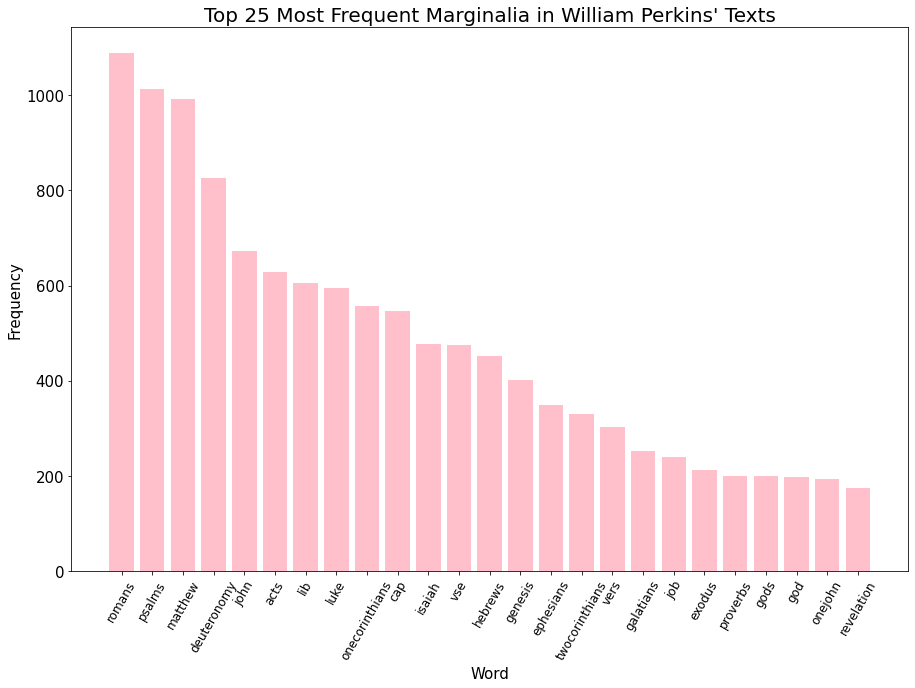

In [51]:
marginTuples = counts.most_common(n=25)
x,y = [],[]
for word,freq in marginTuples: 
    x.append(word)
    y.append(freq)
bar(x,y,"Top 25 Most Frequent Marginalia in William Perkins' Texts",'pink','Word','Frequency')


1045
[('romans 8', 126), ('romans 5', 68), ('romans 7', 65), ('romans 4', 44), ('romans 6', 40), ('romans 1', 37), ('romans 3', 35), ('romans 9', 33), ('romans 12', 29), ('romans 10', 27), ('romans 2', 21), ('romans 14', 18), ('romans 11', 16), ('romans 15', 13), ('romans 13', 10), ('romans 830', 9), ('romans 81', 9), ('romans 85', 9), ('romans 51', 9), ('romans 826', 9), ('romans 55', 8), ('romans 512', 8), ('romans 816', 8), ('romans 823', 8), ('romans 93', 8)]


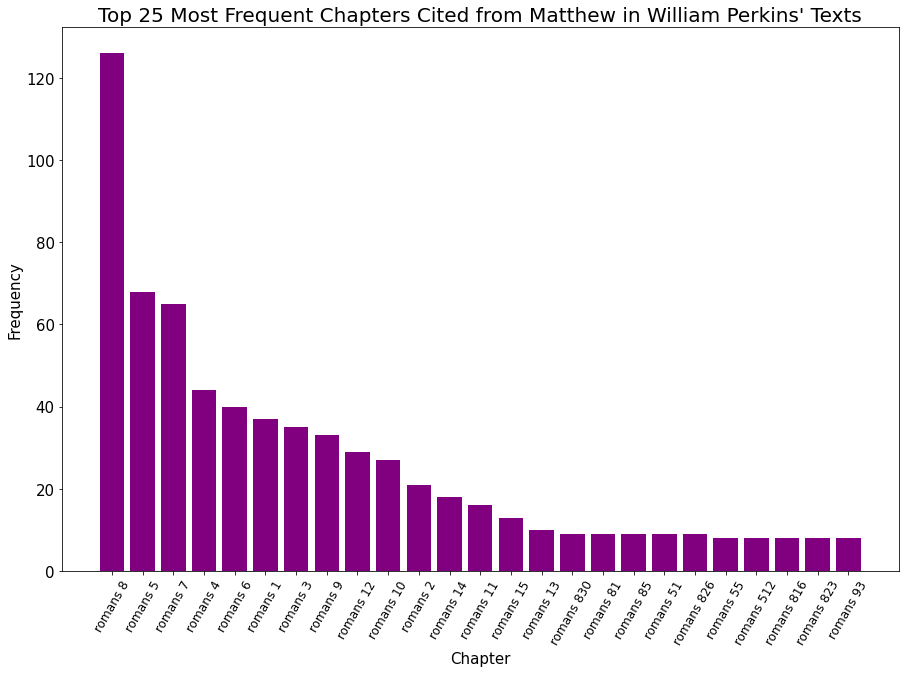

In [77]:
with open('allNotes.txt','r') as file: 
    rawnotesdata = file.readlines()
rawnotesdata = re.sub(r'[\s]+',' ',' '.join(rawnotesdata))
chapters = []
pattern = re.compile(r'romans \d{1,5}\b')
chapinfo = re.findall(pattern,rawnotesdata)
chapters = [note for note in chapinfo]
print(len(chapters))

counts = Counter(chapters).most_common(n=25)
print(counts)
x,y = [],[]
for word,freq in counts: 
    x.append(word)
    y.append(freq)
bar(x,y,f"Top 25 Most Frequent Chapters Cited from Matthew in William Perkins' Texts",'purple','Chapter','Frequency')


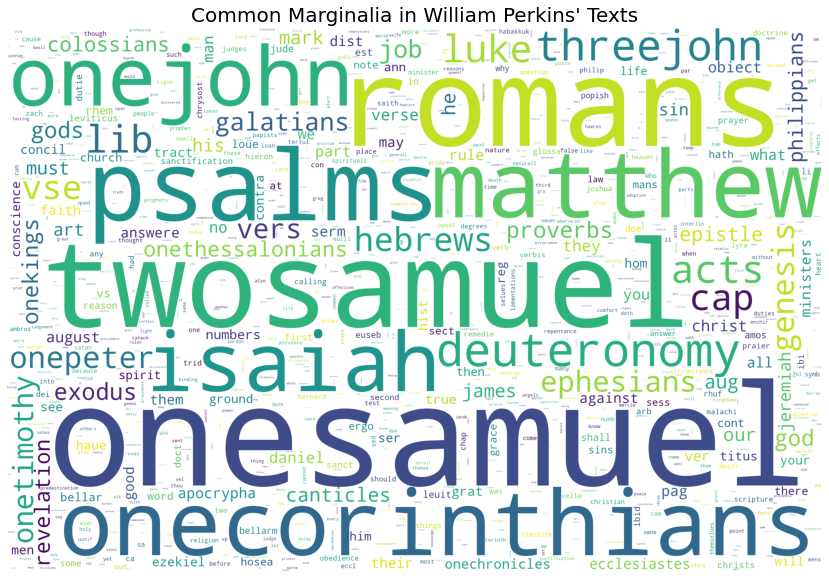

In [128]:
word_cloud = WordCloud(background_color = "white", width=3000, height=2000, max_words=1000, collocations=True).generate_from_frequencies(counts)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.title("Common Marginalia in William Perkins' Texts",fontsize=20)
plt.show()